# Basics of NLP (Natural Language Processing)

* Tasks in NLP:
    - translation, 
    - automatic summarization, 
    - Named Entity Recognition (NER), 
    - speech recognition, 
    - relationship extraction, and 
    - topic segmentation.

**Steps in NLP Pipeline:**   
1. Sentence Segementation  
2. Word Tokenization  
3. Stemming  
4. Lemmatization  
5. Identify Stop Words  
6. Dependency Parsing  
7. POS (Part of Speech) Tagging  
8. Named Entity Recognition (NER)  
9. Chunking  

Difficulties in NLP:
 * Ambiguity
    * Lexical Ambiguity : noun adj or verb
    * Syntactic Ambiguity
    * Referential Ambiguity
 * Lack of Context
 * Named Entity Recognition (NER):


In [1]:
import nltk
import warnings

# nltk.download(all)

c:\Users\abhim\miniforge3\envs\pytorch\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abhim\miniforge3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\abhim\miniforge3\envs\pytorch\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Tokenization

Splits text by word/sentence

```python
 from nltk.tokenize import sent_tokenize, word_tokenize
```

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize

example_string = """
Natural language processing (NLP) is a field of computer science that deals with the interaction between computers and human (natural) languages. It's a subfield of artificial intelligence that deals with the ability of computers to understand and process human language, including speech and text.
NLP has many applications, including machine translation, speech recognition, text analysis, and question answering. It's used in a variety of industries, including healthcare, finance, and customer service.
One of the most important tasks in NLP is to understand the meaning of text. This can be challenging because words can have multiple meanings, and the meaning of a sentence can depend on the context in which it's used. NLP systems use a variety of techniques to understand meaning, including詞法分析, 語法分析, and 語義分析.
Another important task in NLP is to generate text. This can be challenging because it requires the system to understand the meaning of the text it's generating and to be able to express that meaning in a way that is both grammatically correct and fluent. NLP systems use a variety of techniques to generate text, including machine translation, text summarization, and question answering.
NLP is a rapidly growing field, and it's having a major impact on the way we interact with computers. As NLP systems become more sophisticated, they'll be able to understand and process human language in ways that are currently unimaginable. This will lead to new and innovative applications in a variety of industries.
"""

In [3]:
# Sentence tokenizer
sent_tokenize(example_string)

['\nNatural language processing (NLP) is a field of computer science that deals with the interaction between computers and human (natural) languages.',
 "It's a subfield of artificial intelligence that deals with the ability of computers to understand and process human language, including speech and text.",
 'NLP has many applications, including machine translation, speech recognition, text analysis, and question answering.',
 "It's used in a variety of industries, including healthcare, finance, and customer service.",
 'One of the most important tasks in NLP is to understand the meaning of text.',
 "This can be challenging because words can have multiple meanings, and the meaning of a sentence can depend on the context in which it's used.",
 'NLP systems use a variety of techniques to understand meaning, including詞法分析, 語法分析, and 語義分析.',
 'Another important task in NLP is to generate text.',
 "This can be challenging because it requires the system to understand the meaning of the text 

In [4]:
# Word Tokenizer
word_tokenize(example_string)[:50] # Prinying first 50 only

['Natural',
 'language',
 'processing',
 '(',
 'NLP',
 ')',
 'is',
 'a',
 'field',
 'of',
 'computer',
 'science',
 'that',
 'deals',
 'with',
 'the',
 'interaction',
 'between',
 'computers',
 'and',
 'human',
 '(',
 'natural',
 ')',
 'languages',
 '.',
 'It',
 "'s",
 'a',
 'subfield',
 'of',
 'artificial',
 'intelligence',
 'that',
 'deals',
 'with',
 'the',
 'ability',
 'of',
 'computers',
 'to',
 'understand',
 'and',
 'process',
 'human',
 'language',
 ',',
 'including',
 'speech',
 'and']

## Stopwords

Words that you want to ignore ex comman words like 'is', 'an', 'the' etc. as they are not that meaningful in some tasks

In [5]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
chankya_quote = "It is better to die than to preserve this life by incurring disgrace. The loss of life causes but a moment's grief, but disgrace brings grief every day of one's life."
words_in_quote = word_tokenize(chankya_quote)
print(words_in_quote)

['It', 'is', 'better', 'to', 'die', 'than', 'to', 'preserve', 'this', 'life', 'by', 'incurring', 'disgrace', '.', 'The', 'loss', 'of', 'life', 'causes', 'but', 'a', 'moment', "'s", 'grief', ',', 'but', 'disgrace', 'brings', 'grief', 'every', 'day', 'of', 'one', "'s", 'life', '.']


In [7]:
# Creating a set of stopwords in english
stop_words = set(stopwords.words("english"))

In [8]:
# METHOD 1 To FILTER
filtered_list = [] # Holds non-stopwords
for word in words_in_quote:
   if word.casefold() not in stop_words: #casefold() ignores the case
       filtered_list.append(word)

print(filtered_list)

['better', 'die', 'preserve', 'life', 'incurring', 'disgrace', '.', 'loss', 'life', 'causes', 'moment', "'s", 'grief', ',', 'disgrace', 'brings', 'grief', 'every', 'day', 'one', "'s", 'life', '.']


In [9]:
# METHOD 2 : List Comprehesion filter out stopword
filtered_list = [
    word for word in words_in_quote if word.casefold() not in stop_words
]
print(filtered_list)

['better', 'die', 'preserve', 'life', 'incurring', 'disgrace', '.', 'loss', 'life', 'causes', 'moment', "'s", 'grief', ',', 'disgrace', 'brings', 'grief', 'every', 'day', 'one', "'s", 'life', '.']


## Stemming and Lemmatization

### Stemming

Stemming is a task to reduce the word to root word

Some stemmer available in nltk are:
* Porter stemmer
* Snowball stemmer
* ARLSTem Stemmer

In [10]:
# Porter Stemmer in NLTK
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [11]:
stemmed_words = [stemmer.stem(word) for word in words_in_quote]
print(stemmed_words)

['it', 'is', 'better', 'to', 'die', 'than', 'to', 'preserv', 'thi', 'life', 'by', 'incur', 'disgrac', '.', 'the', 'loss', 'of', 'life', 'caus', 'but', 'a', 'moment', "'s", 'grief', ',', 'but', 'disgrac', 'bring', 'grief', 'everi', 'day', 'of', 'one', "'s", 'life', '.']


#### Problem with stemmer

Understemming and overstemming are two ways stemming can go wrong:

1. **Understemming** happens when two related words should be reduced to the same stem but aren’t. This is a false negative.

1. **Overstemming** happens when two unrelated words are reduced to the same stem even though they shouldn’t be. This is a false positive.

#### Snowball Stemmer (Porter2)

Few Rules:  
* ILY  -----> ILI  
* LY   ----->   
* SS   -----> SS  
* S    ----->   
* ED   -----> E,Nil  

In [12]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')

stemmed_words = [snow_stemmer.stem(word) for word in words_in_quote]
print(stemmed_words)

['it', 'is', 'better', 'to', 'die', 'than', 'to', 'preserv', 'this', 'life', 'by', 'incur', 'disgrac', '.', 'the', 'loss', 'of', 'life', 'caus', 'but', 'a', 'moment', "'s", 'grief', ',', 'but', 'disgrac', 'bring', 'grief', 'everi', 'day', 'of', 'one', "'s", 'life', '.']


### Lemmatizing

A **lemma** is a word that represents a whole group of words, and that group of words is called a **lexeme**.

Lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'discoveri'.

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [14]:
lemmatizer.lemmatize("scarves")

'scarf'

In [15]:
string_for_lemmatizing = "The friends of DeSoto love scarves."
words = word_tokenize(string_for_lemmatizing)
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
print(lemmatized_words)

['The', 'friend', 'of', 'DeSoto', 'love', 'scarf', '.']


## Part of Speech (POS) tagging

labelling word according to part of speech

In [16]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_in_quote)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('It', 'PRP'),
 ('is', 'VBZ'),
 ('better', 'RBR'),
 ('to', 'TO'),
 ('die', 'VB'),
 ('than', 'IN'),
 ('to', 'TO'),
 ('preserve', 'VB'),
 ('this', 'DT'),
 ('life', 'NN'),
 ('by', 'IN'),
 ('incurring', 'VBG'),
 ('disgrace', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('loss', 'NN'),
 ('of', 'IN'),
 ('life', 'NN'),
 ('causes', 'NNS'),
 ('but', 'CC'),
 ('a', 'DT'),
 ('moment', 'NN'),
 ("'s", 'POS'),
 ('grief', 'NN'),
 (',', ','),
 ('but', 'CC'),
 ('disgrace', 'VBP'),
 ('brings', 'NNS'),
 ('grief', 'JJ'),
 ('every', 'DT'),
 ('day', 'NN'),
 ('of', 'IN'),
 ('one', 'CD'),
 ("'s", 'POS'),
 ('life', 'NN'),
 ('.', '.')]

POS List:

* CC: It is the conjunction of coordinating
* CD: It is a digit of cardinal
* DT: It is the determiner
* EX: Existential
* FW: It is a foreign word
* IN: Preposition and conjunction
* JJ: Adjective
* JJR and JJS: Adjective and superlative
* LS: List marker
* MD: Modal
* NN: Singular noun
* NNS, NNP, NNPS: Proper and plural noun
* PDT: Predeterminer
* WRB: Adverb of wh
* WP$: Possessive wh
* WP: Pronoun of wh
* WDT: Determiner of wp
* VBZ: Verb
* VBP, VBN, VBG, VBD, VB: Forms of verbs
* UH: Interjection
* TO: To go
* RP: Particle
* RBS, RB, RBR: Adverb
* PRP, PRP$: Pronoun personal and professional

> To change the POS in lemmetizer use ```lemmatizer.lemmatize("worst", pos="a")```

## Chunking

Allows to identify the phrases

Two Types of Chunking Available
 * Chunking Up : gives brief idea
 * Chunking Down : gives detailed info

Group of words make up phrases and there are five major categories.
  - Noun Phrase (NP)
  - Verb phrase (VP)
  - Adjective phrase (ADJP)
  - Adverb phrase (ADVP)
  - Prepositional phrase (PP)

A **chunk grammar** is a combination of rules on how sentences should be chunked. It often uses regular expressions, or regexes.  
 ex:   
 - Noun Phrase Chunking - [NP-Chunking](https://www.nltk.org/book/ch07.html#noun-phrase-chunking)

In [17]:
from nltk.chunk import RegexpParser

lotr_quote = "It's a dangerous business, Frodo, going out your door."

# Step 1 : Tokenization by Words
words_in_lotr_quote = word_tokenize(lotr_quote)

# Step 2 : POS Tagging of Words
nltk.download("averaged_perceptron_tagger")
lotr_pos_tags = nltk.pos_tag(words_in_lotr_quote)

# Step 3: Define Chunk Grammer
# NP: {<DT>?<JJ>*<NN>}
# This grammar identifies noun phrases (NP) consisting of optional determiners,
# followed by zero or more adjectives, and ending with a singular noun.
# Example: "the big brown dog"
grammar = "NP: {<DT>?<JJ>*<NN.*>+}"

# Step 4:  Create Chunk Parser using grammar
chunk_parser = RegexpParser(grammar)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Regexp Cheatsheet

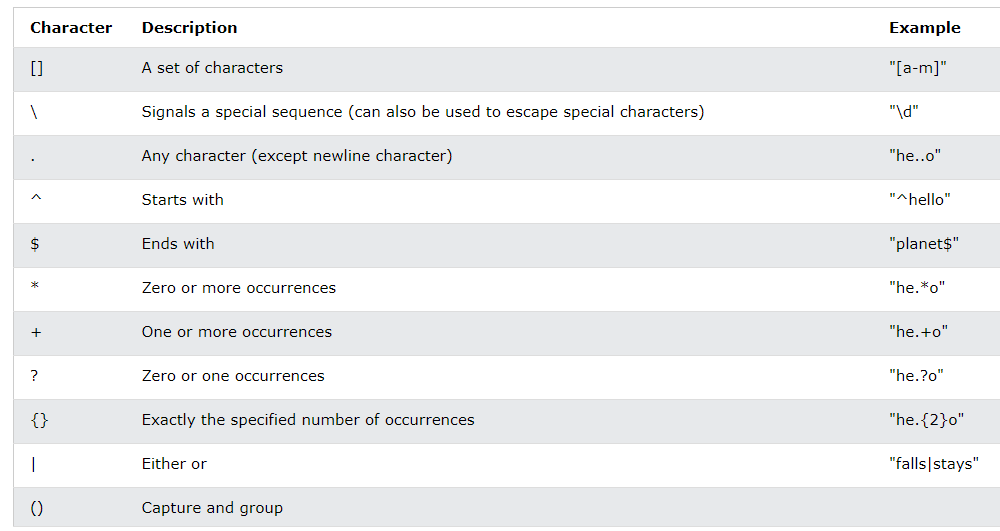

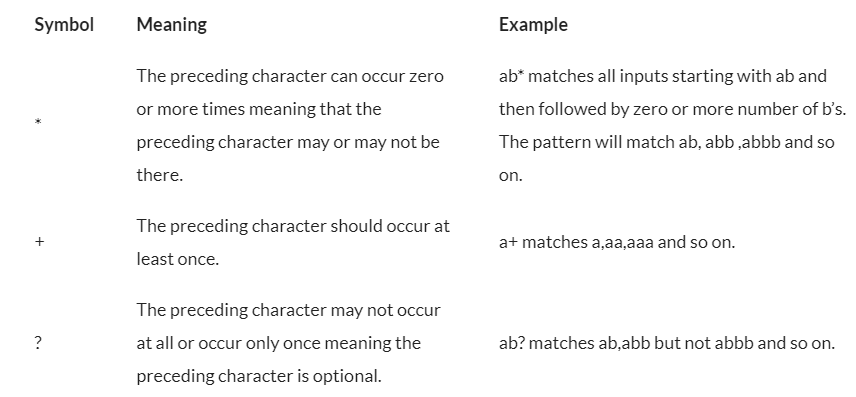

#### Checking Chunking

*Rule above used for NP (Noun Phrase Chuncking)*
- Starts with an optional determiner ('DT') indicated by '?'.
- Followed by any number ('*') of adjectives ('JJ').
- Ends with a singular noun ('NN').

In [18]:
# Step 5 : Trying Your Quote with visual respresention
chucked = chunk_parser.parse(lotr_pos_tags)

In [25]:
%pip install svgling

Note: you may need to restart the kernel to use updated packages.


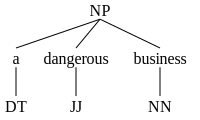

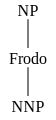

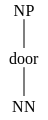

In [26]:
from IPython.display import display
from nltk import Tree

# Assuming `chucked` contains the parsed chunks
for tree in chucked:
    if isinstance(tree, Tree):
        display(tree)